In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
#Import dataset
dd = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
dd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# convert 0 values to meaning for all cloumns except 'Outcome', and 'Pregnancies'
for col in dd.drop(['Outcome', 'Pregnancies'], axis=1):
    val = dd[col].mean()
    dd[col] = dd[col].replace(0, val)

In [4]:
dd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [5]:
dd.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
#check for missing values
dd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

   Outcome
0      500
1      268


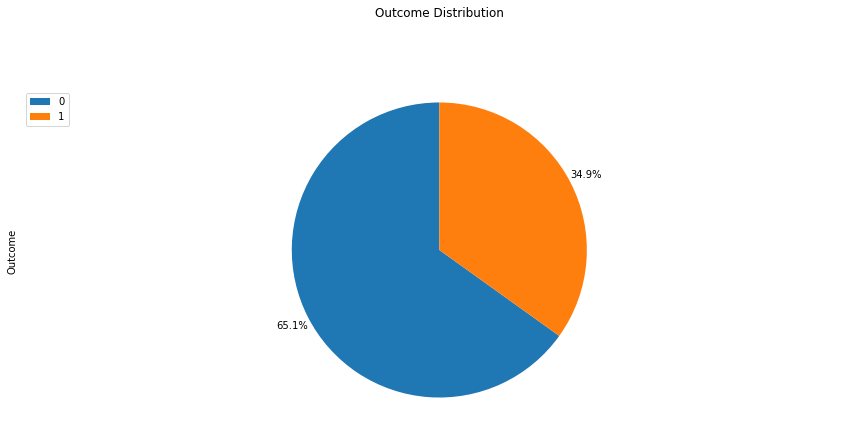

In [7]:
# outcome distribution
outcome = dd['Outcome'].value_counts().to_frame()
print(outcome)
outcome['Outcome'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            labels=None,         
                            pctdistance=1.12,    
                            )

plt.title('Outcome Distribution', y=1.2) 
plt.axis('equal') 
plt.legend(labels=outcome.index, loc='upper left') 
plt.show()

In [8]:
group_names = ['20\'s', '30\'s', '40\'s', '50\'s', '60\'s', '70\'s']
dd['AgeBD'] = pd.cut(dd['Age'], bins=[20,29,39,49,59,69,79], labels=group_names, include_lowest=True )

group_names_bmi = ['Underweight', 'Healthy', 'Overweight', 'Obese1','Obese2', 'Obese3']
dd['BMIBD'] = pd.cut(dd['BMI'], bins=[0,18.5, 24.9, 29.9, 34.9, 39.9, 50 ], labels=group_names_bmi,
                   include_lowest=True  )


dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBD,BMIBD
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,50's,Obese1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,30's,Overweight
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,30's,Healthy
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,20's,Overweight
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,30's,Obese3
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,60's,Obese1
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,20's,Obese2
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,30's,Overweight
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,40's,Obese1


Age Break Down
20's    396
30's    165
40's    118
50's     57
60's     29
70's      2
Name: AgeBD, dtype: int64


Text(0.5, 1.0, 'Age Break Down ')

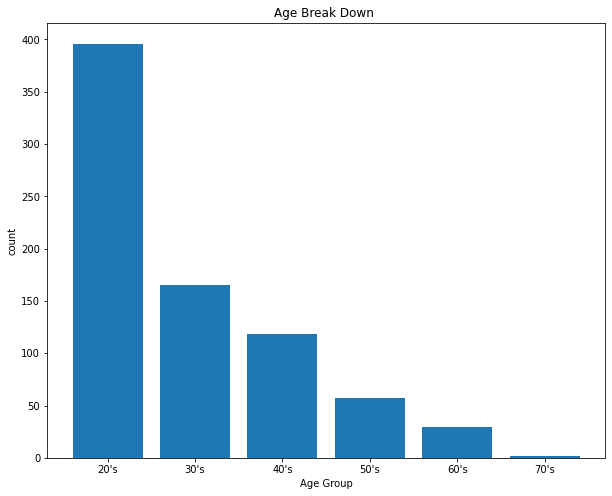

In [9]:
print('Age Break Down')
print(dd.AgeBD.value_counts())
plt.figure(figsize = (10,8))
pyplot.bar(group_names, dd["AgeBD"].value_counts())

pyplot.xlabel("Age Group")
pyplot.ylabel("count")
pyplot.title("Age Break Down ")

BMI Break Down
Obese1         235
Overweight     179
Obese2         150
Healthy        102
Obese3          90
Underweight      4
Name: BMIBD, dtype: int64


Text(0.5, 1.0, 'BMI Break Down ')

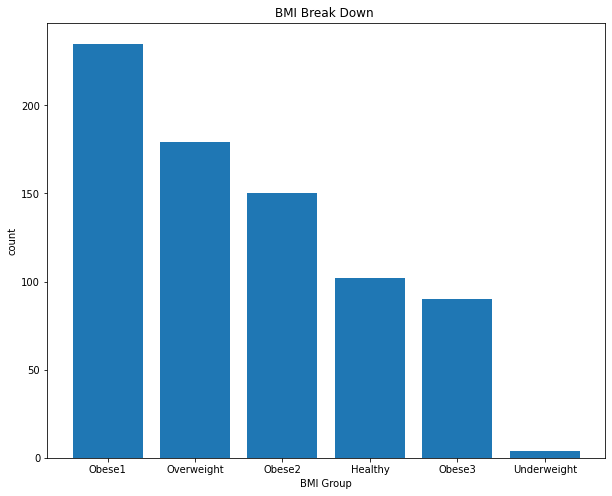

In [10]:
bmibd = dd.BMIBD.value_counts().to_frame()
bmibd.index


print('BMI Break Down')
print(dd.BMIBD.value_counts())
plt.figure(figsize = (10,8))
pyplot.bar(bmibd.index, dd["BMIBD"].value_counts())

pyplot.xlabel("BMI Group")
pyplot.ylabel("count")
pyplot.title("BMI Break Down ")

In [11]:
# find the mean values based on outcomes 
grouped = dd.groupby('Outcome').mean()
grouped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


<AxesSubplot:>

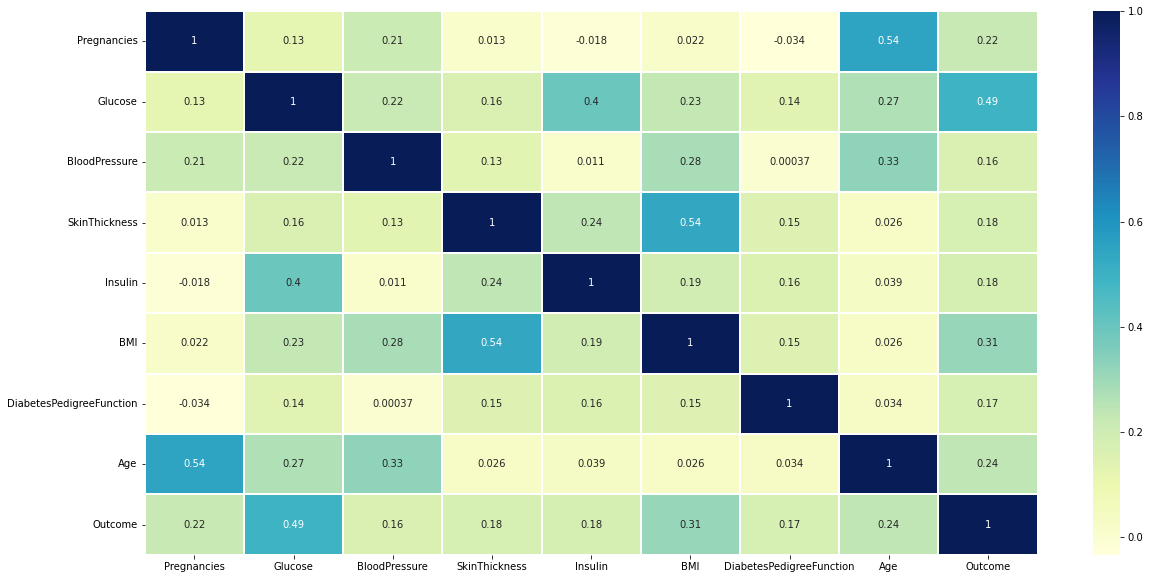

In [12]:
#plot corrlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dd.corr(),annot= True, linewidths=2, cmap = "YlGnBu")

(60.0, 206.75)

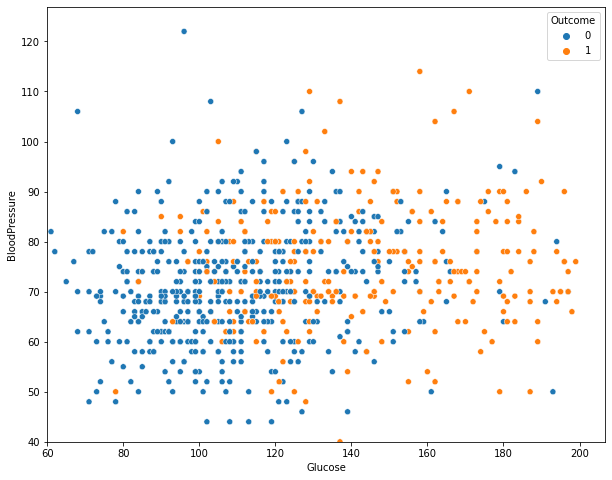

In [13]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', hue = "Outcome",
                data = dd, alpha = 1)
plt.ylim(40, )
plt.xlim(60, )

Findings:
1. Higher glucose levels can be a good indicator of diabetes.
2. High bloodpressure levels and High glucose levels can be a good indicator of diabetes together. 
3. High or low bloodpressure level with a glucose level below 100 can be a good indicator of not having diabetes. 

(20.0, 70.0)

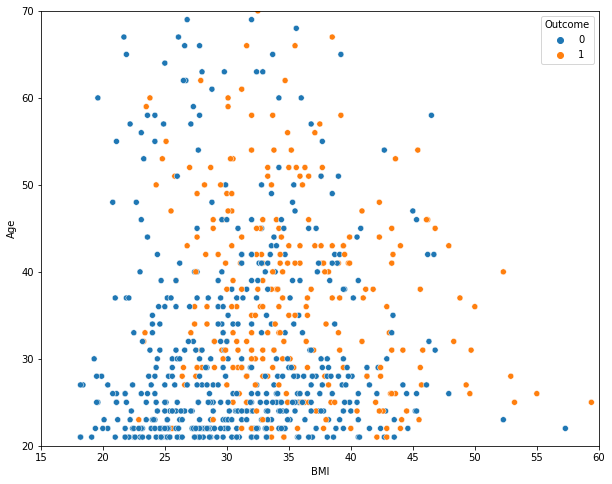

In [14]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'BMI', y = 'Age', hue = "Outcome",
                data = dd, alpha = 1)
plt.xlim(15, 60)
plt.ylim(20,70)

Findings: 

1. Age by it self isn't the best indicator of diabetes. 
2. BMI is a strong indicator of diabetes in comparison to age. 
3. Also someone with an BMI of 25 to 30 and is above age 40 can still develop diabetes. 

(20.0, 70.0)

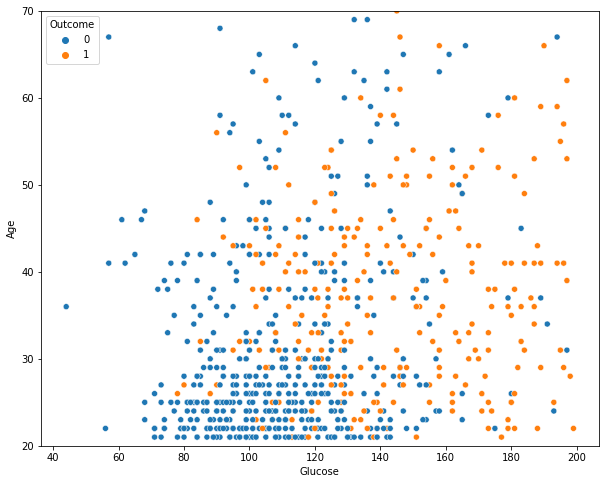

In [15]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Glucose', y = 'Age', hue = "Outcome",
                data = dd, alpha = 1)
plt.ylim(20,70)

Finding: 
1. Higher glucose levels regardless of age increases chance of developing diabetes. 
2. Maintaining glucose levels below 100 can be a good preventative measure one can take to decrease chance of developing diabetes.

(20.0, 80.0)

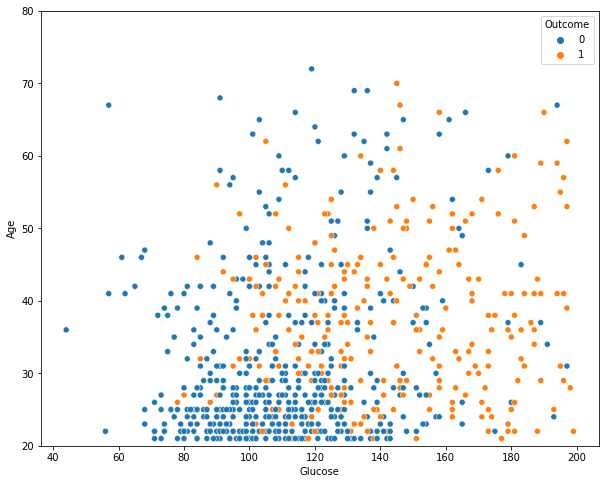

In [16]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Glucose', y = 'Age', hue = "Outcome",
                data = dd, alpha = 1)
plt.ylim(20,80)

Mean Value for Pregnancies Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64


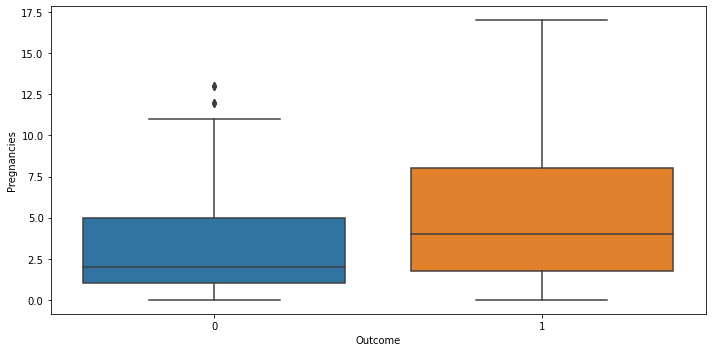

In [17]:
print('Mean Value for Pregnancies',grouped['Pregnancies'])
plt.figure(figsize=(10,5))
sns.boxplot(y=dd['Pregnancies'],x=dd['Outcome'])
plt.tight_layout()
plt.show()

Finding:

In outcome 1 where person has Diabetes, the mean value of pregnancy is 4.865 and has a larger box plot. Indicating having more pregnancies can increase chance of developing diabetes. 


Mean Value for Insulin Outcome
0    106.457354
1    141.426597
Name: Insulin, dtype: float64


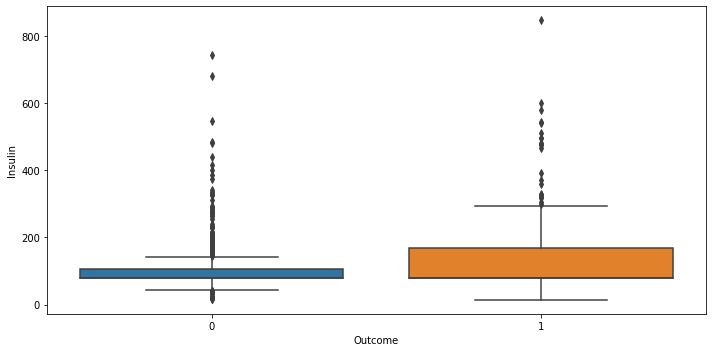

In [18]:
print('Mean Value for Insulin',grouped['Insulin'])
plt.figure(figsize=(10,5))
sns.boxplot(y=dd['Insulin'],x=dd['Outcome'])
plt.tight_layout()
plt.show()

(50.0, 200.0)

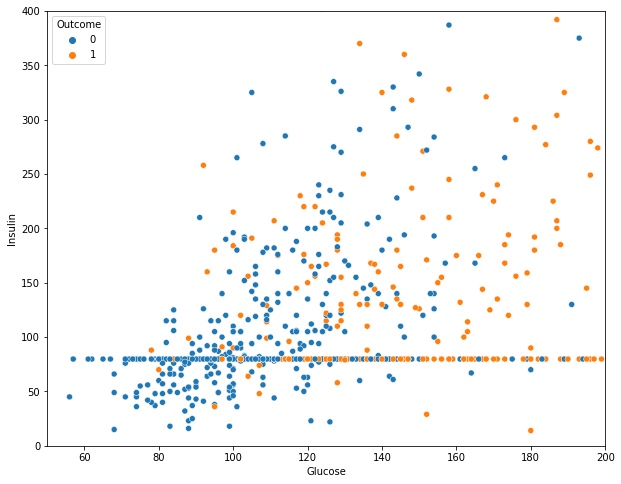

In [19]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='Glucose', y= 'Insulin', hue = "Outcome", data=dd)
plt.ylim(0,400)
plt.xlim(50,200)

Finding 

1. There seem to be a positive correlation between insilin and glucose.
2. When both insilin and glucose levels are high that shows a strong indication of diabetes.  

(15.0, 55.0)

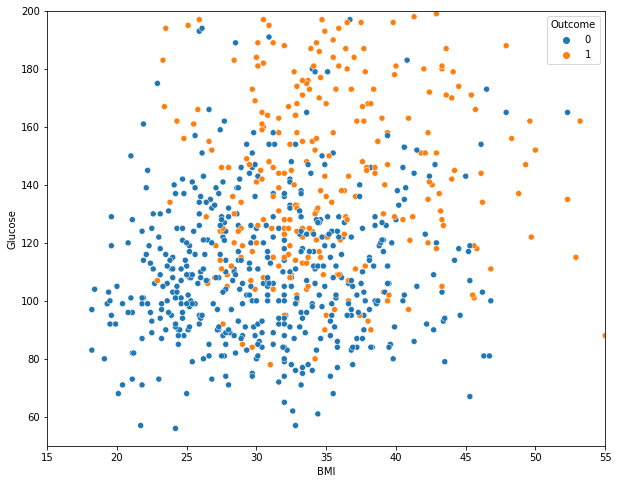

In [20]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='BMI', y= 'Glucose', hue = "Outcome", data=dd)
plt.ylim(50,200)
plt.xlim(15,55)

Finding 
1. BMI seems to be not a reliable indicator of diabetes. Reason being Body mass index (BMI) is a measurement of your overall body mass but isn't a measurement of what the mass consist of. 
2. On the other hands glucose levels does seem to be a reliable indicator of diabetes.

In [21]:
# feature selection 
x = dd.drop(['Outcome','AgeBD', 'BMIBD'], axis=1)
y = dd['Outcome']

In [22]:
# feature scaling 
sc = StandardScaler()
X = sc.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 5)

In [23]:
X_test.shape

(116, 8)

In [24]:
# Build model, compile model, train and validate model preformace
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300, input_dim=8, activation='relu'),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(150, activation='sigmoid'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histo = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose = 1, validation_data=(X_test, y_test))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/50
11/11 [==============================] - 1s 30ms/step - loss: 0.6724 - accuracy: 0.5828 - val_loss: 0.5396 - val_accuracy: 0.6897
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.6718 - val_loss: 0.4536 - val_accuracy: 0.7672
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5218 - accuracy: 0.7224 - val_loss: 0.4366 - val_accuracy: 0.8190
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4929 - accuracy: 0.7546 - val_loss: 0.4005 - val_accuracy: 0.8276
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4943 - accuracy: 0.7592 - val_loss: 0.3888 - val_accuracy: 0.8017
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4896 - accuracy: 0.7546 - val_loss: 0.3880 - val_accuracy: 0.8103
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.7730 - val_loss: 0.3761 - val_accuracy: 0.8103
Epoch 8/50
11/11 [=

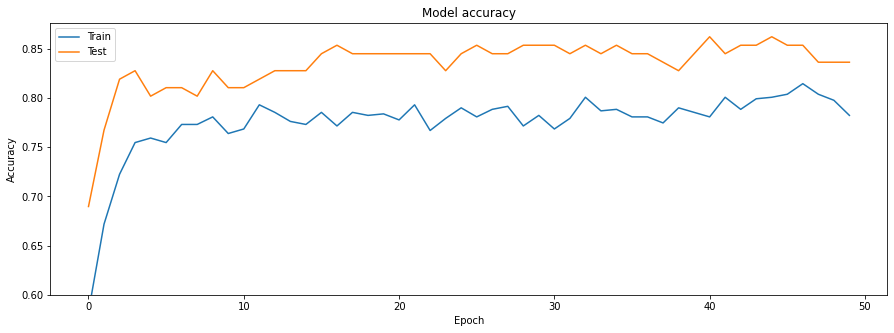

In [25]:
# graph model accuracy of training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(histo.history['accuracy'])
plt.plot(histo.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(.6,)
plt.show()

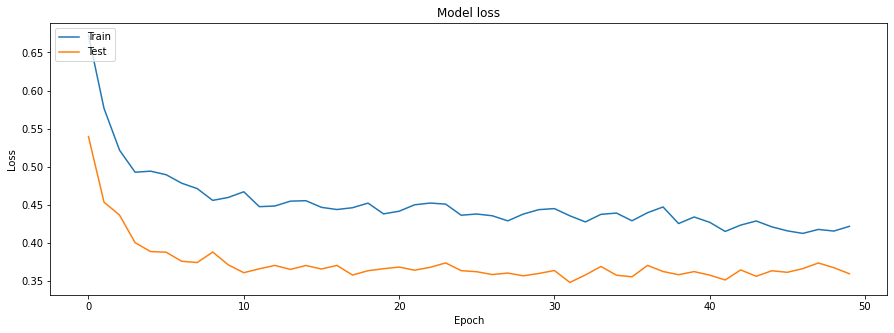

In [26]:
# graph the loss of both training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(histo.history['loss']) 
plt.plot(histo.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [27]:
# Hyperparameter Tuning for classifier models 
model={
    'svm':{ 'model':SVC(),'params':{ 'C':[0.1,1, 10, 100],'gamma': [1,0.1,0.01,0.001],
                                    'kernel':['rbf', 'poly', 'sigmoid']}
    },
    'Randomforest':{ 'model':RandomForestClassifier(),'params':{'n_estimators':range(1,50),
                                                                'criterion':['gini','entropy']}
    },
    'Logistic':{'model':LogisticRegression(),'params':{ 'C': range(1,10)}
    },
    'decision_tree': {'model': DecisionTreeClassifier(),'params': { 'n_neighbors': range(1,50),
                                                                   'criterion': ['gini','entropy']}
    },
    'KNN':{'model':KNeighborsClassifier(),'params':{'n_neighbors' : range(1,50)}
    }
}

In [28]:
scores = []
for model_name, mp in model.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)

In [29]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [30]:
scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
})
    
model_pref = pd.DataFrame(scores,columns=['model','best_params','best_score'])

In [31]:
# best model for hyperparameter tuning given the parameters above, 
model_pref

,model,best_params,best_score
0,KNN,{'n_neighbors': 39},0.762361


Now lets look and compare models without hyperparameter tuning.

In [32]:
reg = LogisticRegression()
reg.fit(X_train, y_train)   
y_pred=reg.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

82.75862068965517


In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_ped2 = knn.predict(X_test)
print(accuracy_score(y_test,y_ped2)*100)

77.58620689655173


In [34]:
svm = SVC()
svm.fit(X_train, y_train)
y_ped3 = svm.predict(X_test)
print(accuracy_score(y_test,y_ped3)*100)

80.17241379310344


In [35]:
rfd = RandomForestClassifier()
rfd.fit(X_train, y_train)
y_ped4 = rfd.predict(X_test)
print(accuracy_score(y_test,y_ped4)*100)

81.89655172413794


In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_ped5 = dtc.predict(X_test)
print(accuracy_score(y_test,y_ped5)*100)

74.13793103448276


After looking at the models above you might ask yourself why does the classifier models without hyperparameter 
tuning perform better than the models with parameter tuning?

The simple answer is the parameters you give to the GridSearchCV. GridSearchCV loops through predefined parameters and fit your estimators (models) on your training set. So, in the end, you select the best parameters from the predefined parameters you set.